In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'

SyntaxError: invalid syntax (2898115676.py, line 5)

## City of Milan ##

In [63]:
# loading all the dataset of the various zones of the city of milan
milan_baggio_deangeli_sansiro = pd.read_csv('Milano_Baggio__De_Angeli__San_Siro.csv', sep=';')
milan_barona_lorentaggio = pd.read_csv('Milano_Barona__Lorenteggio.csv', sep=';')
milan_center = pd.read_csv('Milano_Centro.csv', sep=';')
milan_cittastudi_lambrate_venezia = pd.read_csv('Milano_Città_Studi__Lambrate__Venezia.csv', sep=';')
milan_fiera_gallaratese_quartooggiaro = pd.read_csv('Milano_Fiera__Gallaratese__Quarto_Oggiaro (1).csv', sep=';')
milan_centrale_gorla_turro_greco_crescenzago = pd.read_csv('Milano_Stazione_Centrale__Gorla__Turro__Greco__Crescenzago.csv', sep=';')
milan_garibaldi_niguarda = pd.read_csv('Milano_Stazione_Garibaldi__Niguarda.csv', sep=';')
milan_vigentino_chiaravalle_gratosoglio = pd.read_csv('Milano_Vigentino__Chiaravalle__Gratosoglio.csv', sep=';')
milan_vittoria_forlanini = pd.read_csv('Milano_Vittoria__Forlanini.csv', sep=';')

In [64]:
# putting all the dataset in a single dataset
# creating the new dataframe
milan_cardiovascular = pd.DataFrame()

# putting inside all of the other datasets by adding the specific zone
milan_baggio_deangeli_sansiro['Zona'] = 'Baggio, De Angeli, San Siro'
milan_barona_lorentaggio['Zona'] = 'Barona, Lorenteggio'
milan_center['Zona'] = 'Centro'
milan_cittastudi_lambrate_venezia['Zona'] = 'Città Studi, Lambrate, Venezia'
milan_fiera_gallaratese_quartooggiaro['Zona'] = 'Fiera, Gallaratese, Quarto Oggiaro'
milan_centrale_gorla_turro_greco_crescenzago['Zona'] = 'Stazione Centrale, Gorla, Turro, Greco, Crescenzago'
milan_garibaldi_niguarda['Zona'] = 'Stazione Garibaldi, Niguarda'
milan_vigentino_chiaravalle_gratosoglio['Zona'] = 'Vigentino, Chiaravalle, Gratosoglio'
milan_vittoria_forlanini['Zona'] = 'Vittoria, Forlanini'

# concatenating all of the datasets inside milan_cardiovascular
milan_cardiovascular = pd.concat([milan_baggio_deangeli_sansiro, milan_barona_lorentaggio, milan_center, milan_cittastudi_lambrate_venezia, milan_fiera_gallaratese_quartooggiaro, milan_centrale_gorla_turro_greco_crescenzago, milan_garibaldi_niguarda, milan_vigentino_chiaravalle_gratosoglio, milan_vittoria_forlanini], ignore_index=True)

# this is done so to remove the colum taken by the font of the data which is present in all the datasets and it is  easier to remove in this way than manually in all of them before 
milan_cardiovascular = milan_cardiovascular.dropna()

milan_cardiovascular

,Anno,Maschi,Femmine,Totale,Zona
0,2013,18600.0,22572.0,41172.0,"Baggio, De Angeli, San Siro"
1,2014,18755.0,22829.0,41584.0,"Baggio, De Angeli, San Siro"
2,2015,19064.0,22844.0,41908.0,"Baggio, De Angeli, San Siro"
3,2016,19229.0,22861.0,42090.0,"Baggio, De Angeli, San Siro"
4,2017,19432.0,22919.0,42351.0,"Baggio, De Angeli, San Siro"
...,...,...,...,...,...
102,2019,17194.0,20070.0,37264.0,"Vittoria, Forlanini"
103,2020,16889.0,19624.0,36513.0,"Vittoria, Forlanini"
104,2021,16901.0,19566.0,36467.0,"Vittoria, Forlanini"
105,2022,16904.0,19286.0,36190.0,"Vittoria, Forlanini"


In [65]:
# converting the years into int form string
milan_cardiovascular['Anno'] = milan_cardiovascular['Anno'].astype(int)

Text(0.5, 1.0, 'Total number of cardiovascular diseases for each year per zone')

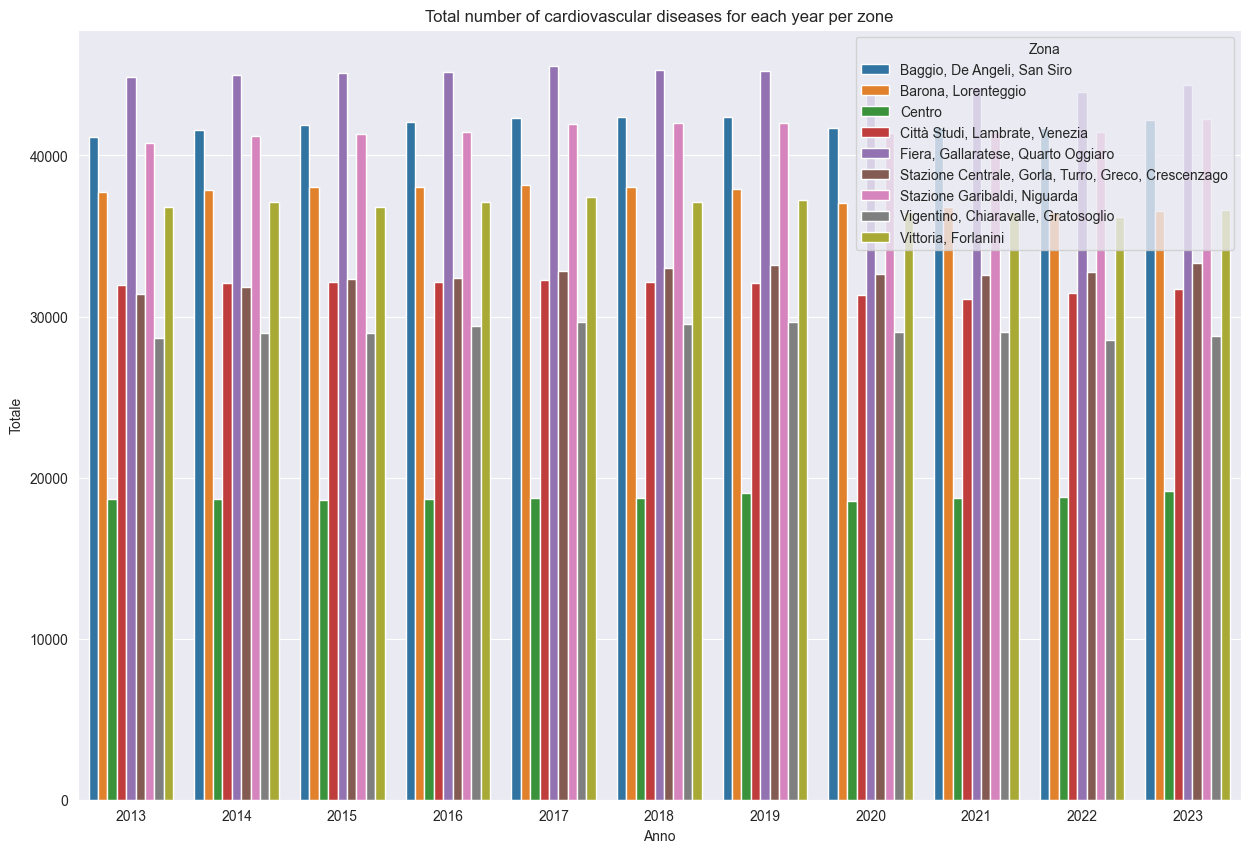

In [66]:
# plotting the total number of cardiovascular diseases for each year per zone
plt.figure(figsize=(15, 10))
sns.barplot(x='Anno', y='Totale', hue='Zona', data=milan_cardiovascular)
plt.title('Total number of cardiovascular diseases for each year per zone')

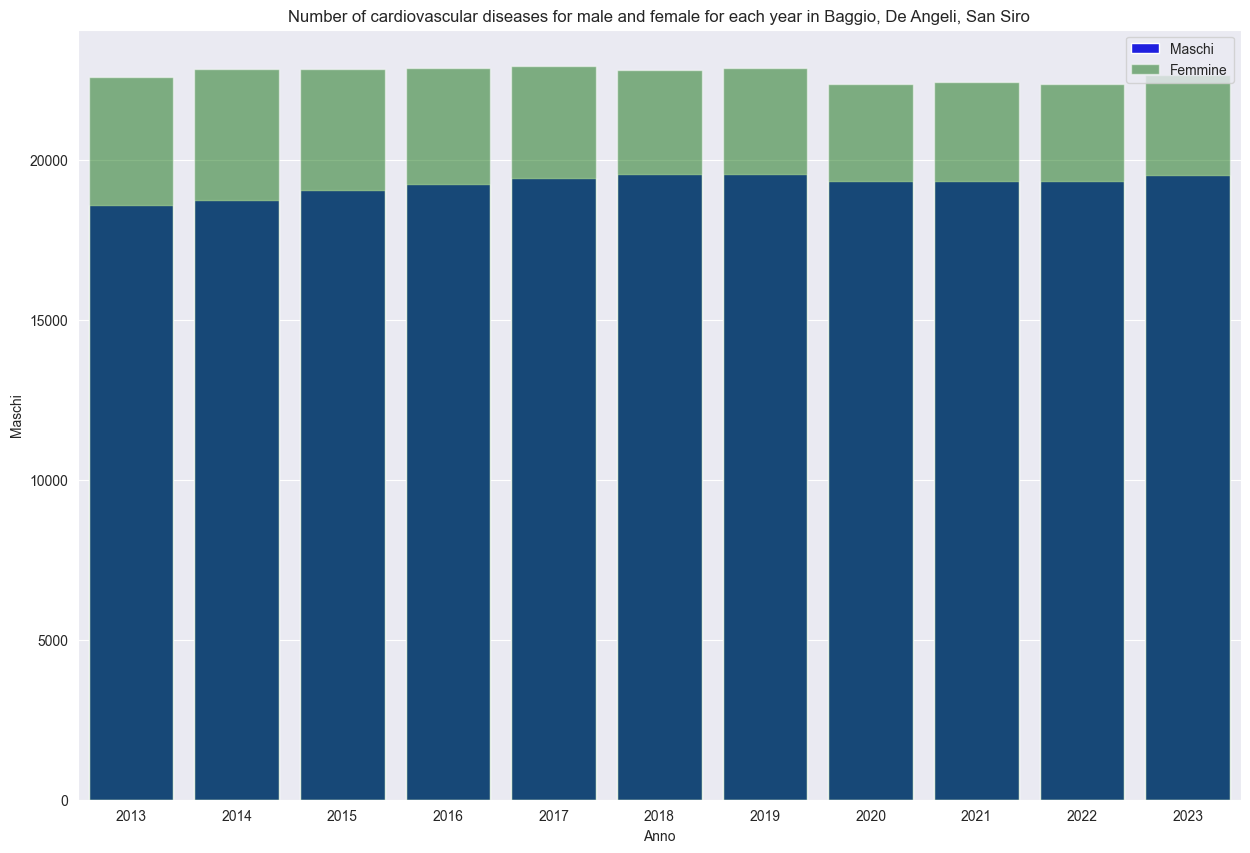

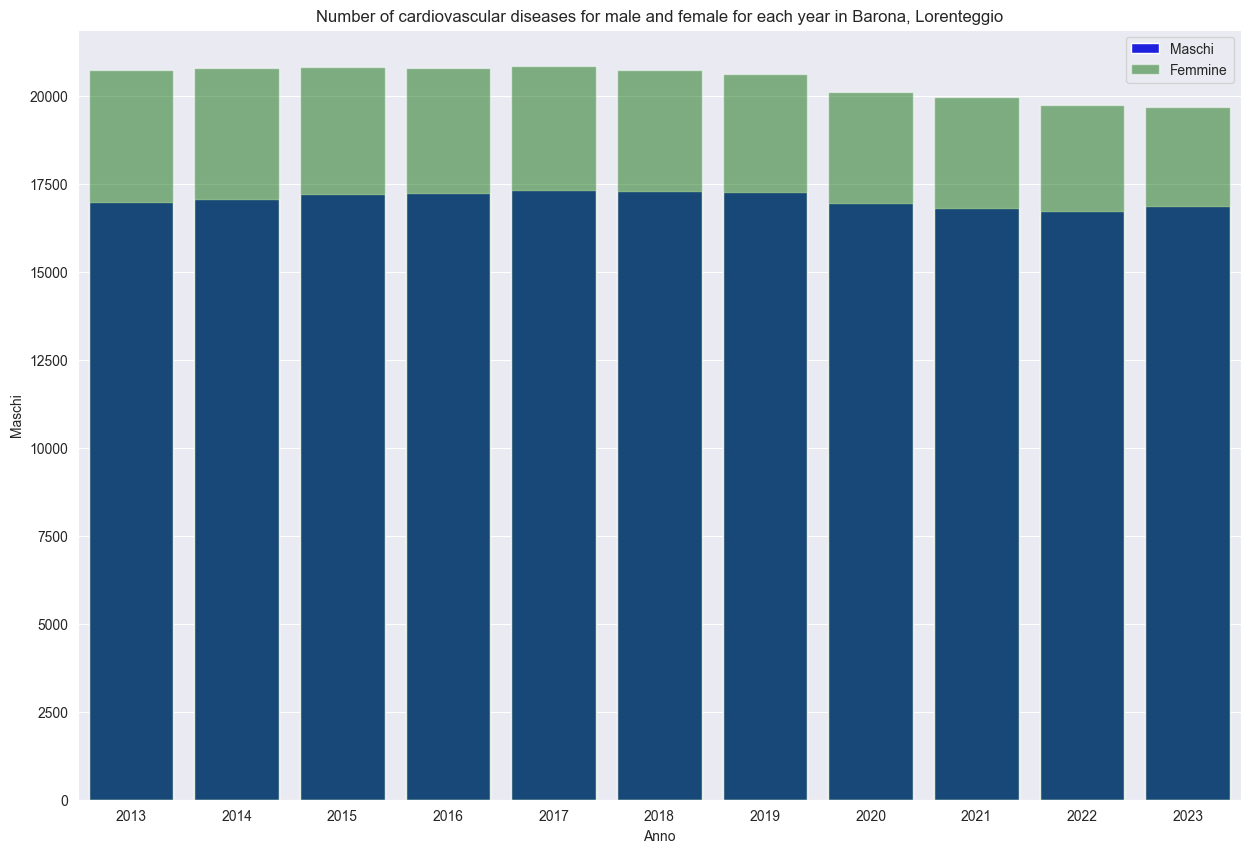

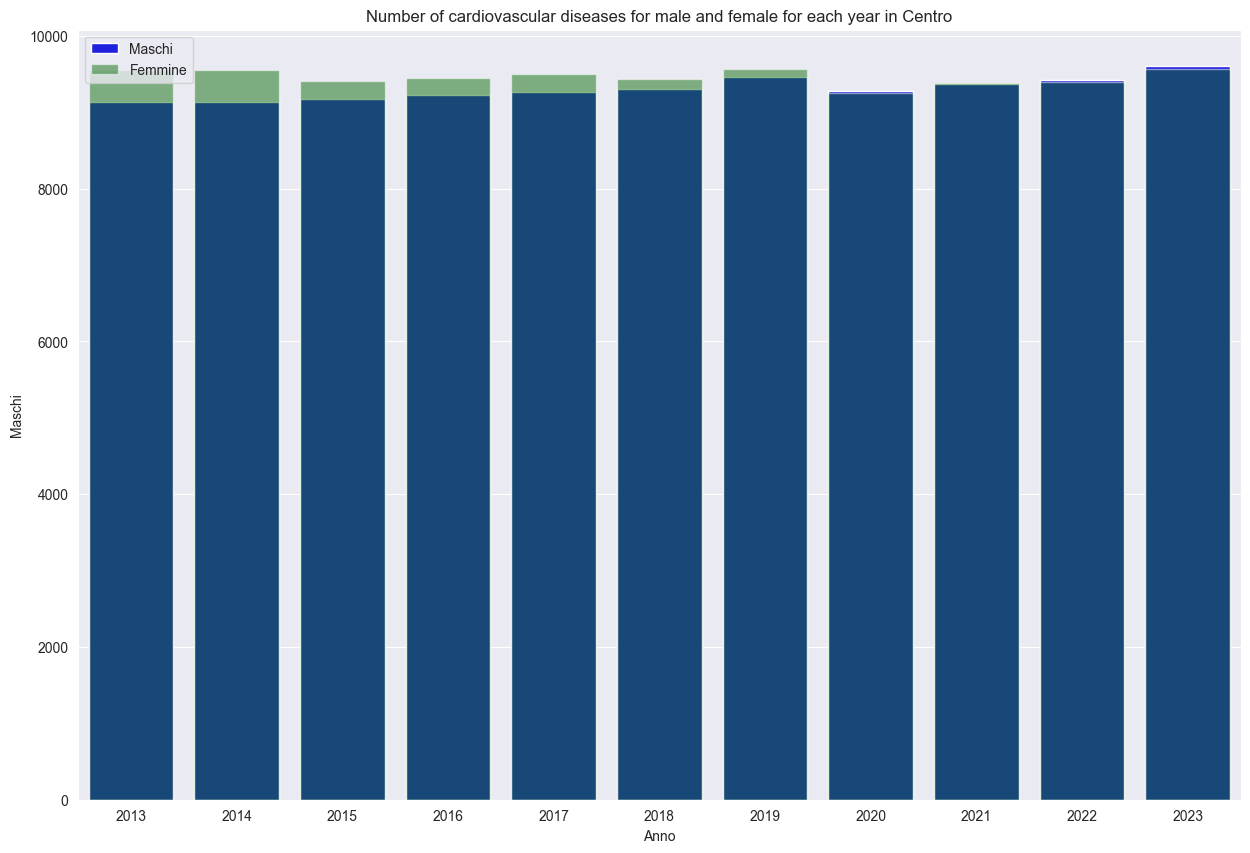

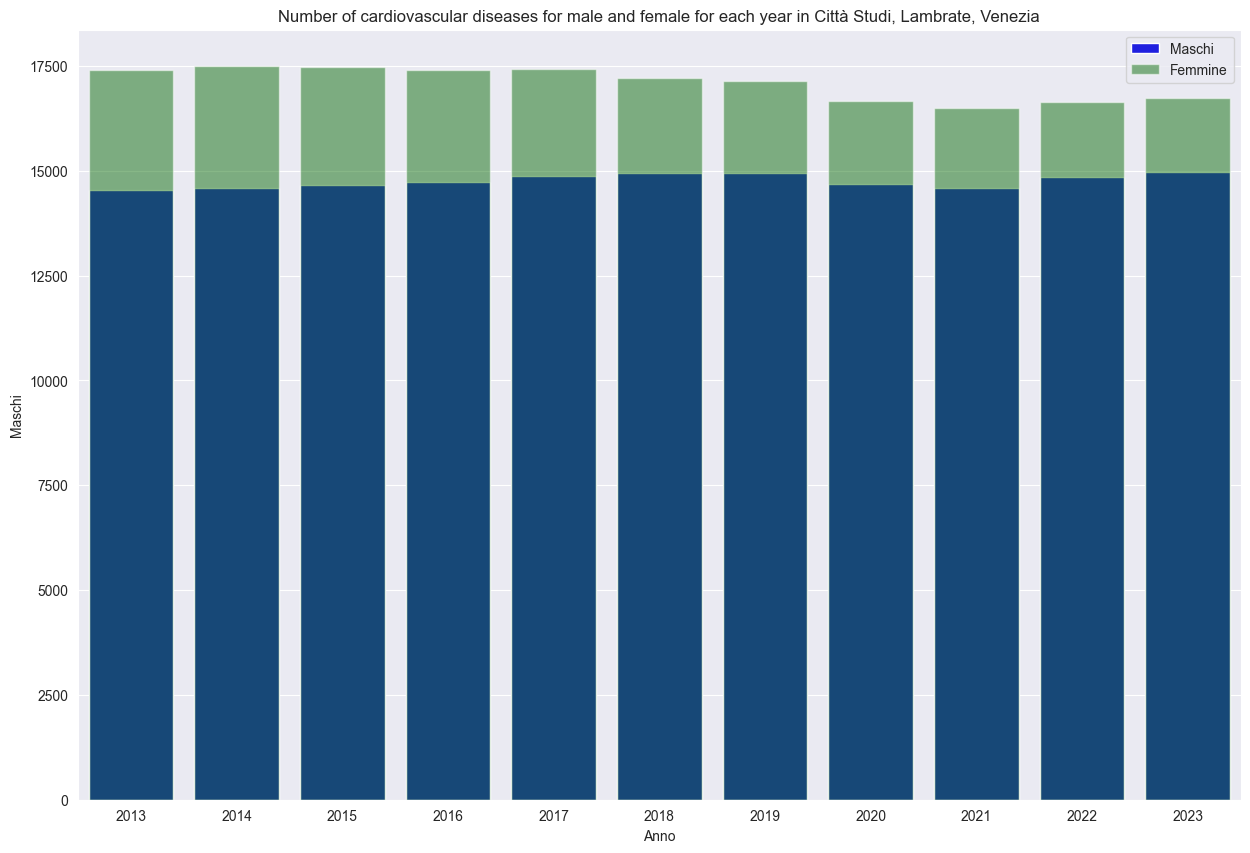

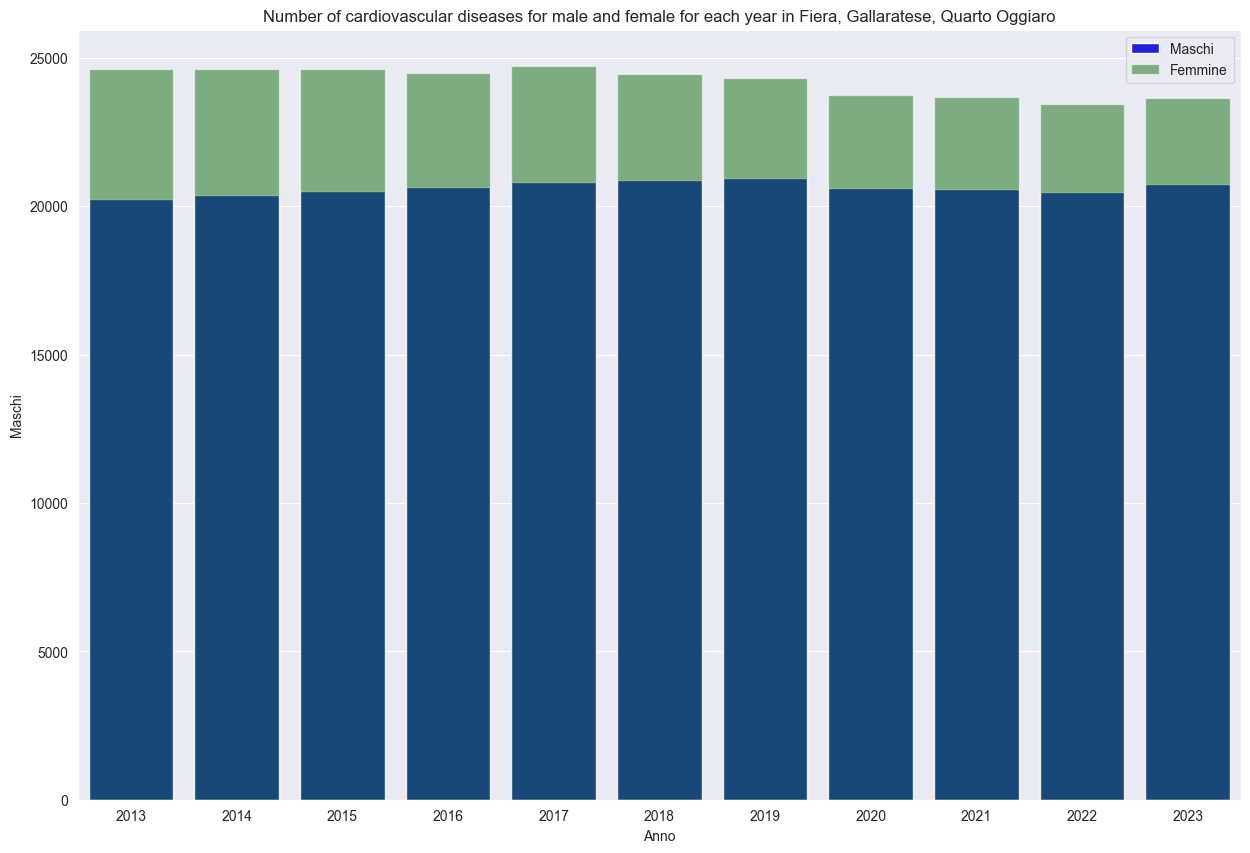

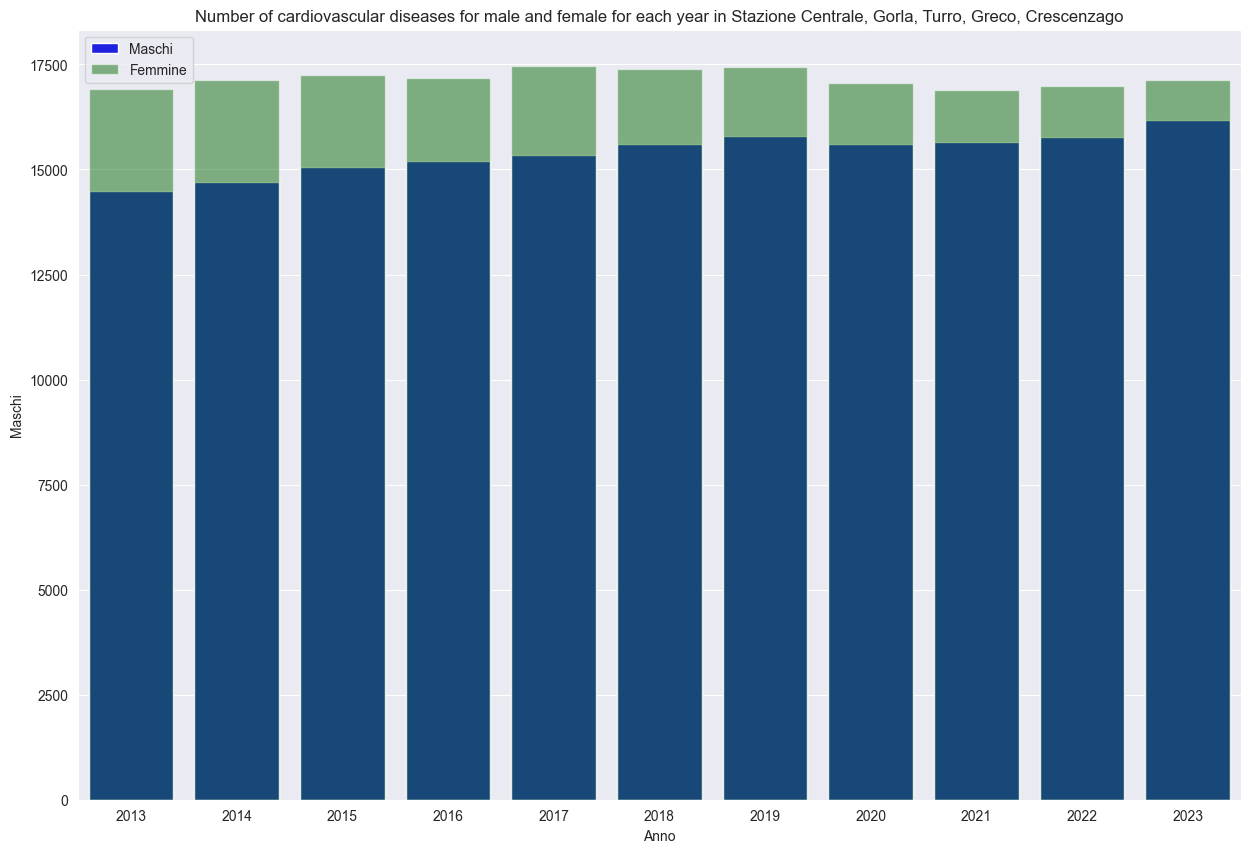

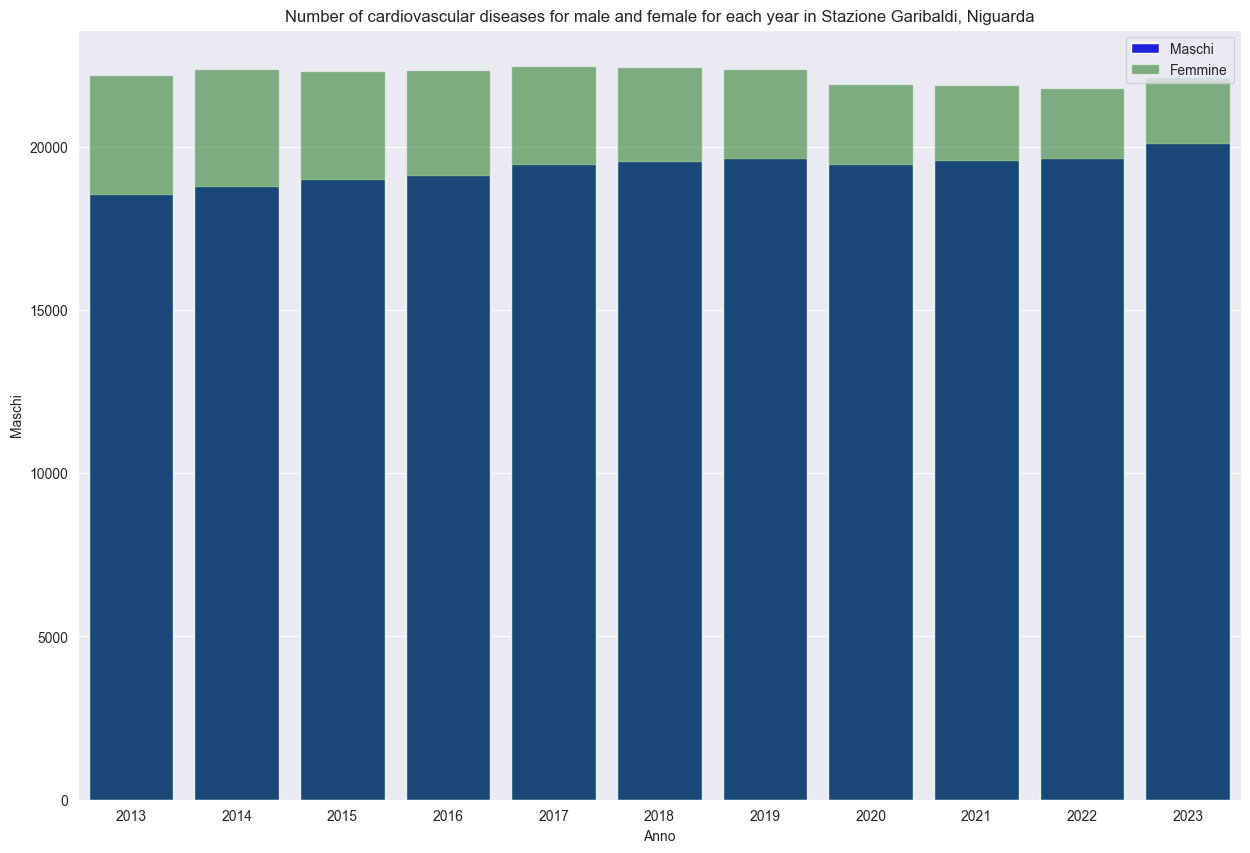

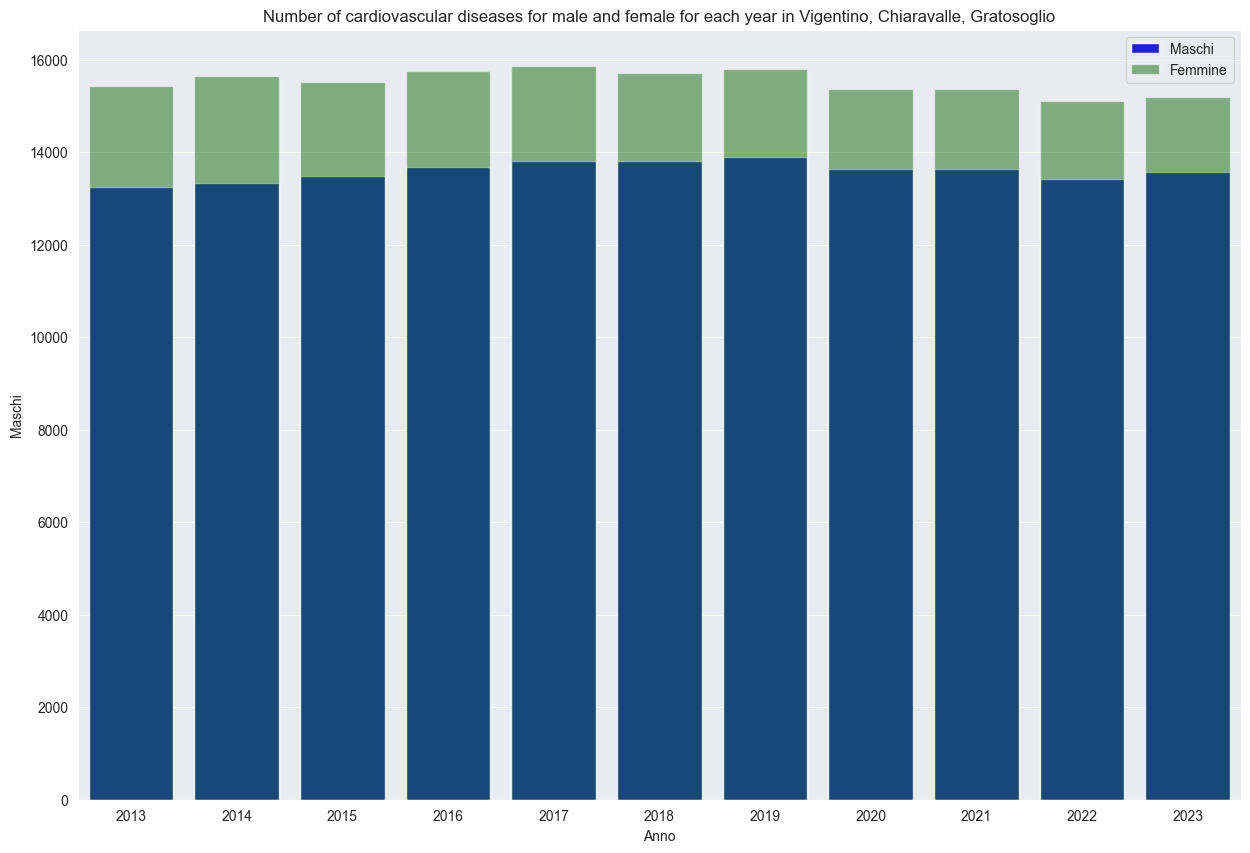

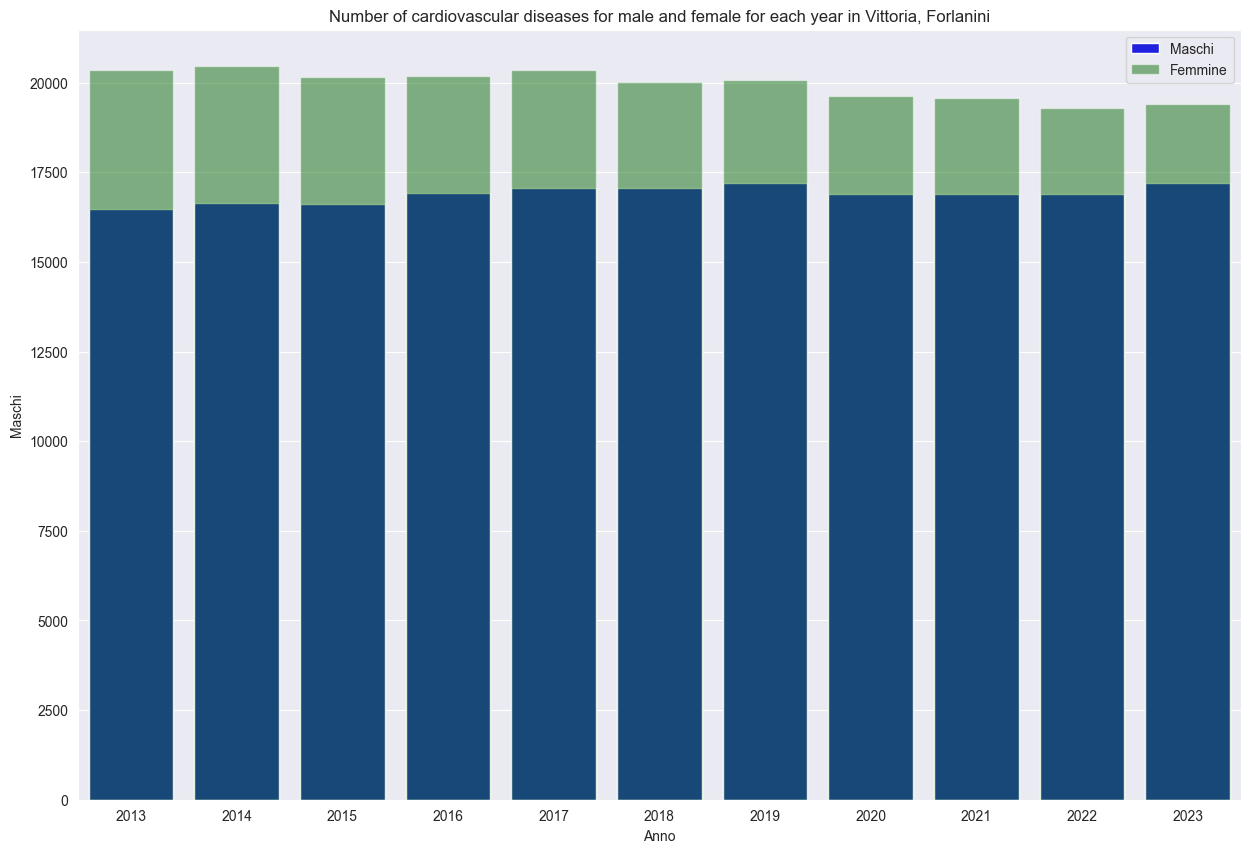

In [67]:
# plotting the number of cardiovascular diseases for male and female a plot for each zone
for zona in milan_cardiovascular['Zona'].unique():
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Anno', y='Maschi', data=milan_cardiovascular[milan_cardiovascular['Zona'] == zona], color='blue', label='Maschi')
    sns.barplot(x='Anno', y='Femmine', data=milan_cardiovascular[milan_cardiovascular['Zona'] == zona], color='green', label='Femmine', alpha=0.5)
    plt.title(f'Number of cardiovascular diseases for male and female for each year in {zona}')
    plt.legend()

## Considerations on the plots ##
As it is possible to see the values for each zone are quite constant through the years having an oscillation not so significant but there are surely some patterns within each zone: Milano Centro is the zone having the lowest total number of cardiovascular diseases, while Milano Fiera, Gallaratese and Quarto Oggiaro are the ones that always have the highest total number of cardiovascular diseases

It may be also noted that there is a tendency for women to develope a cardiovascular disease

## Milan and province ##

### To be kept in mind ###
The dataset got problem due to the header so it has been removed

"<i>Patologie croniche
Gruppo patologie;Malattie cardiovascolari
Genere;Tutti (maschi e femmine)
Classi età;Tutte le classi
Indicatore;Numero assoluto
Anni di ricerca;Tutti gli anni disponibili di ciascuna sezione</i>"

here there is what has been removed

In [68]:
# loading the dataset with the broader area
milan_and_province = pd.read_csv('Milan and province.csv', encoding='latin-1', sep=';')

# dropping the last column of the dataset
milan_and_province = milan_and_province.drop(milan_and_province.columns[-1], axis=1)
milan_and_province = milan_and_province.iloc[:-1]
milan_and_province

,Comune,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Abbadia Cerreto,67.0,64.0,70.0,72.0,70.0,71.0,68.0,71.0,81.0,79.0,75.0
1,Abbiategrasso,7933.0,8091.0,8199.0,8368.0,8507.0,8588.0,8634.0,8603.0,8593.0,8684.0,8854.0
2,Albairate,1058.0,1079.0,1101.0,1141.0,1192.0,1214.0,1220.0,1204.0,1203.0,1197.0,1248.0
3,Arconate,1426.0,1482.0,1507.0,1550.0,1592.0,1610.0,1622.0,1631.0,1655.0,1649.0,1707.0
4,Arese,4961.0,5081.0,5126.0,5272.0,5334.0,5427.0,5480.0,5469.0,5504.0,5584.0,5612.0
...,...,...,...,...,...,...,...,...,...,...,...,...
188,Vimodrone,3827.0,3964.0,4046.0,4113.0,4209.0,4275.0,4329.0,4287.0,4390.0,4425.0,4514.0
189,Vittuone,1928.0,2009.0,2025.0,2109.0,2169.0,2179.0,2230.0,2233.0,2294.0,2340.0,2455.0
190,Vizzolo Predabissi,976.0,1023.0,1058.0,1060.0,1095.0,1115.0,1135.0,1100.0,1104.0,1102.0,1123.0
191,Zelo Buon Persico,1348.0,1426.0,1459.0,1501.0,1550.0,1576.0,1608.0,1616.0,1657.0,1685.0,1744.0


In [69]:
# replacing all '(*)' values with NaN
milan_and_province = milan_and_province.replace('(*)', np.nan)

# finding whether there are any missing values in the dataset
missing_values = milan_and_province.isnull().sum()
missing_values

Comune    0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
2023      0
dtype: int64

In [70]:
# removing the rows of the dataset which aren't actually the municipalities of the province of Milan
milan_municipalities = [
    'Abbiategrasso', 'Albairate', 'Arconate', 'Arese', 'Arluno', 'Assago',
    'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo',
    'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', 'Cassano d\'Adda', 'Cassina de\' Pecchi', 'Cassinetta di Lugagnano', 'Castano Primo', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cinisello Balsamo', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cormano', 'Cornaredo', 'Corsico', 'Cuggiono', 'Cusago', 'Cusano Milanino',
    'Dairago', 'Dresano',
    'Gaggiano', 'Garbagnate Milanese', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti',
    'Inveruno', 'Inzago',
    'Lacchiarella', 'Lainate', 'Legnano', 'Liscate', 'Locate di Triulzi',
    'Magenta', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melegnano', 'Melzo', 'Mesero', 'Milano', 'Morimondo', 'Motta Visconti',
    'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio',
    'Opera', 'Ossona', 'Ozzero',
    'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Pero', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuele', 'Pioltello', 'Pogliano Milanese', 'Pozzo D\'Adda', 'Pozzuolo Martesana', 'Pregnana Milanese',
    'Rescaldina', 'Rho', 'Robecchetto con Induno', 'Robecco sul Naviglio', 'Rodano', 'Rosate', 'Rozzano',
    'San Colombano al Lambro', 'San Donato Milanese', 'San Giorgio su Legnano', 'San Giuliano Milanese', 'San Vittore Olona', 'San Zenone al Lambro', 'Santo Stefano Ticino', 'Sedriano', 'Segrate', 'Senago', 'Sesto San Giovanni', 'Settala', 'Settimo Milanese', 'Solaro',
    'Trezzano Rosa', 'Trezzano sul Naviglio', 'Trezzo sull\'Adda', 'Tribiano', 'Truccazzano', 'Turbigo',
    'Vanzaghello', 'Vanzago', 'Vaprio d\'Adda', 'Vermezzo con Zelo', 'Vernate', 'Vignate', 'Villa Cortese', 'Vimodrone', 'Vittuone', 'Vizzolo Predabissi',
    'Zibido San Giacomo'
]

milan_and_province = milan_and_province[milan_and_province['Comune'].isin(milan_municipalities)]
milan_and_province

,Comune,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Abbiategrasso,7933.0,8091.0,8199.0,8368.0,8507.0,8588.0,8634.0,8603.0,8593.0,8684.0,8854.0
2,Albairate,1058.0,1079.0,1101.0,1141.0,1192.0,1214.0,1220.0,1204.0,1203.0,1197.0,1248.0
3,Arconate,1426.0,1482.0,1507.0,1550.0,1592.0,1610.0,1622.0,1631.0,1655.0,1649.0,1707.0
4,Arese,4961.0,5081.0,5126.0,5272.0,5334.0,5427.0,5480.0,5469.0,5504.0,5584.0,5612.0
5,Arluno,2898.0,2982.0,3027.0,3033.0,3049.0,3075.0,3096.0,3108.0,3181.0,3193.0,3306.0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Villa Cortese,1494.0,1533.0,1544.0,1602.0,1622.0,1614.0,1634.0,1669.0,1668.0,1638.0,1725.0
188,Vimodrone,3827.0,3964.0,4046.0,4113.0,4209.0,4275.0,4329.0,4287.0,4390.0,4425.0,4514.0
189,Vittuone,1928.0,2009.0,2025.0,2109.0,2169.0,2179.0,2230.0,2233.0,2294.0,2340.0,2455.0
190,Vizzolo Predabissi,976.0,1023.0,1058.0,1060.0,1095.0,1115.0,1135.0,1100.0,1104.0,1102.0,1123.0


In [71]:
milan_and_province.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5689.593985,5782.323308,5852.165414,5934.390977,6020.263158,6066.879699,6096.751880,6041.451128,6084.165414,6096.270677,6203.353383
std,27007.359336,27201.480685,27280.757954,27390.660905,27597.315076,27541.758301,27598.787205,27050.999288,27015.981793,26946.228195,27252.450091
min,187.000000,189.000000,183.000000,189.000000,186.000000,185.000000,189.000000,183.000000,185.000000,181.000000,175.000000
25%,1139.000000,1172.000000,1197.000000,1238.000000,1259.000000,1292.000000,1287.000000,1284.000000,1292.000000,1308.000000,1331.000000
50%,1964.000000,2022.000000,2108.000000,2140.000000,2233.000000,2265.000000,2292.000000,2336.000000,2366.000000,2349.000000,2440.000000
75%,4494.000000,4572.000000,4689.000000,4796.000000,4926.000000,5046.000000,5085.000000,5061.000000,5119.000000,5122.000000,5248.000000
max,312093.000000,314346.000000,315259.000000,316523.000000,318908.000000,318249.000000,318921.000000,312580.000000,312180.000000,311377.000000,314942.000000


### Understanding the numbers ###
The data for each municipality are normalized by the total population of the municipality considered so that they can be compared to each other

Mean and standard deviation will be analyzed and then it will be defined a sort of method so to understand which municipalities have an higher number of cardiovascular diseases in respect of their population 

In [72]:
# loading the dataset
demographics = pd.read_csv('Demographics.csv', sep=',')
demographics

,age_group,Comune,Sesso,Popolazione,Year
0,Young,Abbiategrasso,Femmine,4310,2011
1,Young,Abbiategrasso,Maschi,4540,2011
2,Young,Albairate,Femmine,658,2011
3,Young,Albairate,Maschi,739,2011
4,Young,Arconate,Femmine,943,2011
...,...,...,...,...,...
7177,Old,Vittuone,Maschi,830,2019
7178,Old,Vizzolo Predabissi,Femmine,519,2019
7179,Old,Vizzolo Predabissi,Maschi,451,2019
7180,Old,Zibido San Giacomo,Femmine,580,2019


In [73]:
demographics = demographics[demographics['Comune'].isin(milan_municipalities)]
demographics

,age_group,Comune,Sesso,Popolazione,Year
0,Young,Abbiategrasso,Femmine,4310,2011
1,Young,Abbiategrasso,Maschi,4540,2011
2,Young,Albairate,Femmine,658,2011
3,Young,Albairate,Maschi,739,2011
4,Young,Arconate,Femmine,943,2011
...,...,...,...,...,...
7177,Old,Vittuone,Maschi,830,2019
7178,Old,Vizzolo Predabissi,Femmine,519,2019
7179,Old,Vizzolo Predabissi,Maschi,451,2019
7180,Old,Zibido San Giacomo,Femmine,580,2019


In [74]:
# dropping Milan form the dataset
province = milan_and_province[milan_and_province['Comune'] != 'Milano']
demographics = demographics[demographics['Comune'] != 'Milano']

In [75]:
# considering the whole population of each municipality for each year
demographics = demographics.groupby(['Comune', 'Year']).sum()
demographics = demographics.drop(['age_group', 'Sesso'], axis=1)
demographics

Popolazione
Comune             Year             
Abbiategrasso      2011        31228
                   2012        31320
                   2013        31836
                   2014        32080
                   2015        32150
...                              ...
Zibido San Giacomo 2015         6765
                   2016         6754
                   2017         6736
                   2018         6756
                   2019         6761

[1188 rows x 1 columns]

In [76]:
# translating all the years into features and the value of population into the value
demographics = demographics.unstack()
demographics.columns = demographics.columns.droplevel()
demographics = demographics.reset_index()
demographics.columns = ['Comune', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
demographics

,Comune,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,31228,31320,31836,32080,32150,32399,32377,32567,32473
1,Albairate,4660,4652,4688,4712,4684,4654,4679,4683,4674
2,Arconate,6473,6557,6618,6605,6633,6679,6700,6636,6614
3,Arese,19350,19134,19164,19180,19341,19373,19516,18939,19190
4,Arluno,11512,11593,11739,11810,11906,11950,11949,12047,12094
...,...,...,...,...,...,...,...,...,...,...
127,Villa Cortese,6184,6180,6205,6218,6223,6221,6211,6179,6124
128,Vimodrone,16383,16643,16967,17080,16997,16945,16866,16873,16836
129,Vittuone,9036,8994,8941,8878,8929,8803,8882,8934,8974
130,Vizzolo Predabissi,4032,4057,4001,3962,3903,3927,3928,3996,4031


In [77]:
# dropping all the years which are not possible to compare
province = province.drop(['2020', '2021', '2022', '2023'], axis=1)
demographics = demographics.drop(['2011', '2012'], axis=1)

In [78]:
# ordering by municipalities the datasets
province = province.sort_values(by='Comune')
demographics = demographics.sort_values(by="Comune")

In [79]:
province = province.reset_index(drop=True)
demographics = demographics.reset_index(drop=True)

In [80]:
# normalizing each value of cardiovascular disease 
normal_province = province.copy()

for year in province.columns[1:]:
    normal_province[year] = province[year] / demographics[year]

normal_province

,Comune,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,0.249183,0.252213,0.255023,0.258280,0.262748,0.263703,0.265882
1,Albairate,0.225683,0.228990,0.235056,0.245165,0.254755,0.259236,0.261018
2,Arconate,0.215473,0.224375,0.227197,0.232071,0.237612,0.242616,0.245237
3,Arese,0.258871,0.264911,0.265033,0.272131,0.273314,0.286552,0.285565
4,Arluno,0.246869,0.252498,0.254242,0.253808,0.255168,0.255250,0.255995
...,...,...,...,...,...,...,...,...
127,Villa Cortese,0.240774,0.246542,0.248112,0.257515,0.261150,0.261207,0.266819
128,Vimodrone,0.225555,0.232084,0.238042,0.242726,0.249555,0.253363,0.257128
129,Vittuone,0.215636,0.226290,0.226789,0.239577,0.244202,0.243900,0.248496
130,Vizzolo Predabissi,0.243939,0.258203,0.271074,0.269926,0.278768,0.279029,0.281568


In [81]:
# computing the mean and standard deviation of the normalized values for each municipality
nmeans = []
nstddev = []

for year in normal_province.columns[1:]:
    nmeans.append(normal_province[year].mean())
    nstddev.append(normal_province[year].std())

nmeans = pd.Series(nmeans, index=normal_province.columns[1:], name='Mean')
nstddev = pd.Series(nstddev, index=normal_province.columns[1:], name='Std Deviation')
# computing the range that can be considered 'normal' --> mean + std deviation
normal_range = pd.Series(nmeans + nstddev, name='Normal Range')
stats = pd.concat([nmeans, nstddev, normal_range], axis=1)
stats = stats.transpose()
stats

In [84]:
# understanding which municipalities within the province dataset have a number of cardiovascular diseases higher than the normal range for each year
outofrange = []
for year in normal_province.columns[1:]:
    outofrange.append(normal_province[normal_province[year] > stats[year]['Normal Range']]['Comune'])
    
outofrange = pd.DataFrame(outofrange, index=normal_province.columns[1:]).transpose()
outofrange

,2013,2014,2015,2016,2017,2018,2019
3,Arese,Arese,NaN,Arese,NaN,Arese,Arese
13,Binasco,Binasco,Binasco,Binasco,Binasco,NaN,NaN
14,Bollate,Bollate,Bollate,Bollate,Bollate,Bollate,Bollate
15,Bresso,Bresso,Bresso,Bresso,Bresso,Bresso,Bresso
35,Cesano Boscone,NaN,Cesano Boscone,Cesano Boscone,Cesano Boscone,Cesano Boscone,Cesano Boscone
37,Cinisello Balsamo,Cinisello Balsamo,Cinisello Balsamo,Cinisello Balsamo,Cinisello Balsamo,Cinisello Balsamo,Cinisello Balsamo
39,Cologno Monzese,Cologno Monzese,Cologno Monzese,Cologno Monzese,Cologno Monzese,Cologno Monzese,Cologno Monzese
44,Corsico,Corsico,Corsico,Corsico,Corsico,Corsico,Corsico
47,Cusano Milanino,Cusano Milanino,Cusano Milanino,Cusano Milanino,Cusano Milanino,Cusano Milanino,Cusano Milanino
51,Garbagnate Milanese,Garbagnate Milanese,Garbagnate Milanese,Garbagnate Milanese,Garbagnate Milanese,Garbagnate Milanese,Garbagnate Milanese


In [85]:
# printing the top 10 municipalities with the highest population for each year
# it may be possible to see how the top 10 municipalities with the largest population are always the same
top_demo = demographics.sort_values(by='2019', ascending=False).head(10)
top_demo

,Comune,2013,2014,2015,2016,2017,2018,2019
109,Sesto San Giovanni,79492,80231,80879,81202,81601,81717,81667
37,Cinisello Balsamo,73351,73794,74174,73891,74280,74153,73845
60,Legnano,59176,59510,59608,59438,59336,59069,59091
93,Rho,50593,50404,50249,50157,50431,50468,50047
80,Paderno Dugnano,47097,47425,47401,47195,47273,47493,47168
39,Cologno Monzese,46861,47142,47266,47260,47027,46929,46839
98,Rozzano,41407,41889,41987,41887,41676,41674,41570
102,San Giuliano Milanese,37337,37658,37831,37964,37922,37793,38001
88,Pioltello,36407,36521,36498,36361,36470,36301,36428
14,Bollate,35624,35653,35236,35292,35315,36037,36055


### Some considerations ###
Noticing that the municipalities with out of range values are always the same, at first it may have been thought that the number of cardiovascular diseases was higher in the municipalities with the highest population but this is not the case: in fact, looking at the municipalities with the largest number of inhabitants, it is possible to see how not all the municipalities in the two lists match
